# 8.2 Exploratory Multidimensional IRT

The `mirt` package allows us to fit all dichotomous and polytomous IRT models
presented above in a multidimensional exploratory or confirmatory fashion. The
main function is `mirt()`. Through the `itemtype` argument, a particular IRT model
can be specified. In this section, we focus on exploratory specifications, that is,
*each item is free to load on each factor*.  

## Fit the models
Let us illustrate an exploratory multidimensional 2-PL model fit using all binary
ZAREKI addition and subtraction items described in Sect. 4.2.1. First, we compute
an exploratory Princals in order to get an idea of the structure and dimensionality.  

We load the dataset `zareki` and inspect it. Then, extract the first 16 columns, name this subset `itzareki`. Next, fit the model using the `princals` function, name it `przar`.

In [ ]:
ro.r('data("zareki")')
# Convert to Python
zareki = pandas2ri.rpy2py(ro.globalenv['zareki'])

# Eliminate first item (misfit)
itzareki = zareki.loc[:, zareki.columns[:16]]
print(itzareki.head())

# Put data into R
ro.globalenv['itzareki'] = itzareki

# Fit the model
ro.r("przar <- princals(itzareki)")

   addit1  addit2  addit3  addit4  addit5  addit6  addit7  addit8  subtr1  \
1     1.0     1.0     1.0     1.0     1.0     1.0     1.0     0.0     1.0   
2     1.0     1.0     1.0     1.0     0.0     1.0     1.0     0.0     1.0   
3     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
4     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
5     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   

   subtr2  subtr3  subtr4  subtr5  subtr6  subtr7  subtr8  
1     1.0     1.0     1.0     1.0     1.0     0.0     1.0  
2     1.0     1.0     1.0     1.0     1.0     0.0     1.0  
3     1.0     0.0     1.0     1.0     0.0     0.0     1.0  
4     1.0     0.0     1.0     1.0     0.0     1.0     1.0  
5     1.0     0.0     1.0     1.0     0.0     0.0     1.0  


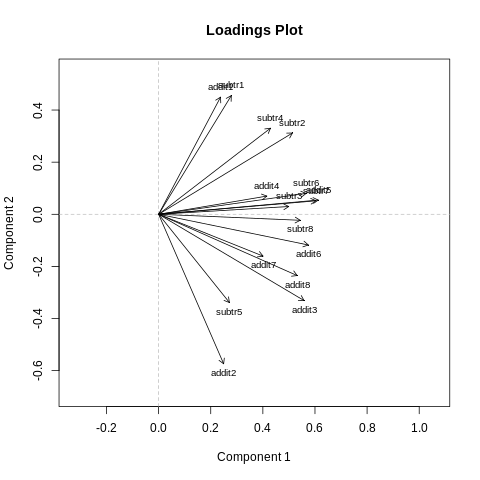

In [ ]:
%%R
plot(przar)


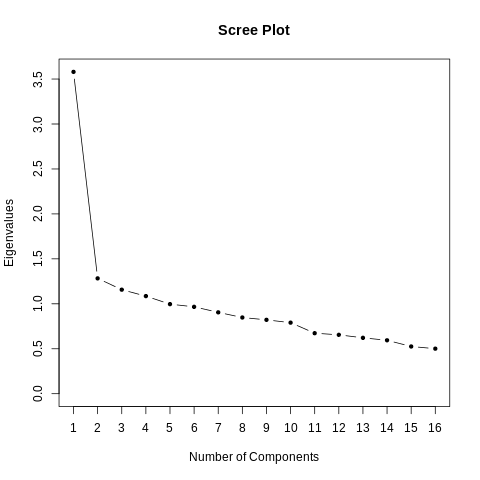

In [ ]:
%%R
plot(przar, "screeplot")

The scree plot suggests that two dimensions should be
sufficient. From the loadings plot in the left panel, we see that the dimensions are
not addition vs. subtraction, as we might have expected.
Let us fit two models: a unidimensional 2-PL and a two-dimensional 2-PL.
Note that we use a 2-PL model as the data is dichotomous. If we would want to apply the `mirt()` function to a polytomous dataset we could for example use a graded response model by setting the `itemtype` argument to `'graded'` (see below).  

Fit one 1D model and one 2D model using the `mirt` function and the extracted subset. Note the we want to fit 2-PL model, therefore we should set `itemtype = "2PL` Remember the syntax? If not, check the hint! Name your models `zar1d` and `zar2d`.

In [ ]:
ro.r('zar1d <- mirt(itzareki, 1, itemtype = "2PL")')
ro.r('zar2d <- mirt(itzareki, 2, itemtype = "2PL")')

Iteration: 20, Log-Lik: -2252.281, Max-Change: 0.00008
Iteration: 133, Log-Lik: -2235.476, Max-Change: 0.00010


## Compare and investigate the models

Use the `anova` function to compare the two models.

In [ ]:
print(ro.r('anova(zar1d, zar2d)'))

           AIC    SABIC       HQ      BIC    logLik    X2 df     p
zar1d 4568.562 4589.671 4617.415 4691.182 -2252.281               
zar2d 4564.952 4595.957 4636.706 4745.051 -2235.476 33.61 15 0.004



For further fit examination of the 1D and the 2D model, let us compute the M2 statistic
including the CFA/SEM fit indices.

In [ ]:
print(ro.r("M2(zar1d)"))
print(ro.r("M2(zar2d)"))

           M2  df          p      RMSEA     RMSEA_5   RMSEA_95      SRMSR
stats 129.675 104 0.04483401 0.02694632 0.004455123 0.04072114 0.05232611
            TLI       CFI
stats 0.9757999 0.9790266

            M2 df         p RMSEA RMSEA_5   RMSEA_95      SRMSR       TLI
stats 94.11394 89 0.3350678 0.013       0 0.03274862 0.04382372 0.9943675
            CFI
stats 0.9958225



The output of the 1D model suggest slight misfit (significant M2 p-value) and some criteria (e.g. TLI and CFI) suggest a worse fit of the 1D model *compared to the 2D model*.
For the 2D model, we get a low RMSEA and a high CFI, and the M2 p-value is not significant. The 2D model **fits well**. Note that the 1D model does not provide a bad fit but we can assume that the 2D model provides a slightly better fit, therefore we continue using the 2D model.
Itemfit statistics can be computed using the corresponding function in `mirt`.  

Let us still search for potentially bad fitting items. For that, lets first print out itemfit statistics using `mirt::itemfit`.
The function only uses the model object as an input. Remember, we want to investigate the 2D model (`zar2d`). Assign the output to `ifit2D2pl`.

In [ ]:
ro.r("ifit2D2pl <- mirt::itemfit(zar2d)")
# Convert to Python
ifit2D2pl = pandas2ri.rpy2py(ro.globalenv['ifit2D2pl'])

ifit2D2pl.head()

item       S_X2  df.S_X2  RMSEA.S_X2    p.S_X2
1  addit1   1.588226      6.0    0.000000  0.953420
2  addit2  15.986000      8.0    0.054185  0.042581
3  addit3   7.655657      7.0    0.016598  0.363934
4  addit4   5.685148      7.0    0.000000  0.576955
5  addit5   6.581252      7.0    0.000000  0.473740

As we don't want to go through all items manually, lets do this in a clever way. Look at the output from the `head` function, notice the p.S_X2? Lets use this p-value (column 4 of `ifit2D2pl`) as a cut-off. If an item has a significant (p < .05) S_X2 value we should take a closer look at it. Think about how to you can print the items (rows) of the `ifit2D2pl` object which have a p-value (column 5) smaller than .05.

In [ ]:
misfitting_items = ifit2D2pl[ifit2D2pl.iloc[:, 4] < 0.05]
print(misfitting_items)

      item       S_X2  df.S_X2  RMSEA.S_X2    p.S_X2
2   addit2  15.986000      8.0    0.054185  0.042581
12  subtr4  20.871019      8.0    0.068789  0.007498


The subtr4 item and the subtr2 could be eliminated since they show some misfit, and then the
model needs to be refitted again. However, since the global model fit suggested a
well-fitting solution, let us keep them.  

The factor analytic parameterization can be obtained through the summary call.
We can also request to apply an orthogonal or non-orthogonal rotation for better
interpretability.

In [ ]:
print(ro.r("summary(zar2d, rotate = 'varimax')"))
print(ro.r("summary(zar2d, rotate = 'oblimin')"))


Rotation:  varimax 

Rotated factor loadings: 

           F1     F2    h2
addit1 0.4128 0.2238 0.220
addit2 0.0114 0.5467 0.299
addit3 0.2524 0.7828 0.677
addit4 0.4719 0.4551 0.430
addit5 0.5499 0.4741 0.527
addit6 0.2206 0.6760 0.506
addit7 0.2945 0.3930 0.241
addit8 0.1309 0.7139 0.527
subtr1 0.5203 0.1779 0.302
subtr2 0.9047 0.0903 0.827
subtr3 0.4172 0.4279 0.357
subtr4 0.4412 0.3204 0.297
subtr5 0.2362 0.2261 0.107
subtr6 0.5291 0.3940 0.435
subtr7 0.5490 0.4833 0.535
subtr8 0.5142 0.4090 0.432

Rotated SS loadings:  3.271 3.448 

Factor correlations: 

   F1 F2
F1  1   
F2  0  1
None

Rotation:  oblimin 

Rotated factor loadings: 

            F1      F2    h2
addit1  0.3784  0.1509 0.220
addit2 -0.1638  0.6057 0.299
addit3  0.0232  0.8112 0.677
addit4  0.3684  0.3943 0.430
addit5  0.4474  0.3969 0.527
addit6  0.0229  0.6998 0.506
addit7  0.1948  0.3673 0.241
addit8 -0.0872  0.7634 0.527
subtr1  0.5106  0.0742 0.302
subtr2  0.9584 -0.1147 0.827
subtr3  0.3174  0.3770 0.357
sub

## Plot results

The `mirt` package provides several plotting options for two-dimensional models. Lets plot the Item characteristic
surface (ICS) for the 3rd item in 2D. For that, use the `itemplot` function. It takes the model (`zar2d`), the item (3) and a list of rotation coordinates as inputs. The latter is already specified, you only need to complete the remaining 2 arguments. Note: `main = "ICS addit3"` sets the title of the plot.

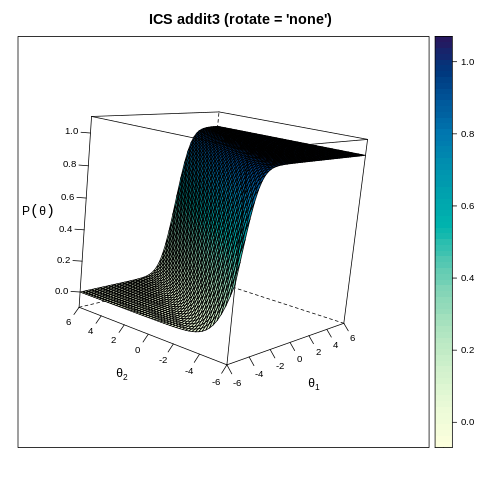

In [ ]:
%%R
itemplot(zar2d, 3, main = "ICS addit3", rot = list(xaxis = -70, yaxis = 50, zaxis = 10))

## Compute person scores, one for each dimension

Finally, we can compute the person parameters, one for each dimension (only
first six persons shown here).

In [ ]:
ro.r("fscores(zar2d)")

array([[ 0.31629087,  0.08593608],
       [-0.13045086, -0.26424651],
       [-0.31739614,  0.07663827],
       [ 0.12578337,  0.45310387],
       [-0.31739614,  0.07663827],
       [-0.43184699, -0.89689762],
       [ 0.07289139,  0.35176114],
       [-1.23422604, -2.06142719],
       [-1.48519979, -0.09390775],
       [-2.20962536, -2.5090477 ],
       [ 0.10344465,  0.06438149],
       [ 0.55527341,  0.85361562],
       [-0.76972592, -1.50475692],
       [-0.4801597 , -0.51822168],
       [ 0.72721598,  0.52640777],
       [-1.2854217 , -1.59494078],
       [-1.67145428, -0.71656631],
       [-1.79202968, -1.27932313],
       [ 0.56545172,  0.76491233],
       [-2.49302421, -2.77576318],
       [-0.69890551, -1.05061595],
       [-0.21921476, -1.28373925],
       [-1.63795304, -2.83945932],
       [-0.92519626, -1.78262542],
       [-1.68028061, -1.08794529],
       [-2.09102447, -2.0604506 ],
       [-0.30693942, -1.12662113],
       [-0.1059822 ,  0.11204094],
       [-0.33548998,